In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_III/LPR/0_conc


In [3]:
# mac       - phase III - LPR - 240 timepoints - devel
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/devel/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel.csv'

# mac       - phase III - LPR - 240 timepoints - full
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/full/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full.csv'


df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())
display(df_lpr.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
44757,4457,22097,H07,4457_22097_H07,0.410,3.039,2.687,1.377,0.000,0.000,...,11.801,18.257,17.200,10.414,14.054000,19.325000,11.771,15.775,15.214000,12.643
44758,4457,22097,H08,4457_22097_H08,0.140,0.788,0.000,0.235,1.363,0.000,...,0.000,0.000,13.915,23.894,24.219001,22.199001,17.062,24.027,25.584001,20.297
44759,4457,22097,H09,4457_22097_H09,0.046,7.927,6.095,5.866,8.247,2.588,...,15.934,15.963,18.418,3.608,4.169000,14.569000,15.436,12.355,17.204000,14.720
44760,4457,22097,H10,4457_22097_H10,0.015,6.812,8.603,12.531,3.115,0.000,...,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000
44761,4457,22097,H12,4457_22097_H12,0.000,2.133,3.411,3.063,1.915,0.000,...,15.954,10.916,6.787,8.197,12.142000,14.601000,0.258,20.165,12.394000,0.000


In [5]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

215

In [6]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

501

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,13.011,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000


## Load morphological data for filtering wells that have dead fish

In [7]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/morpho/full/wide/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,725,21511,A01,725_21511_A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,725,21511,A02,725_21511_A02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,725,21511,A03,725_21511_A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,725,21511,A04,725_21511_A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725,21511,A05,725_21511_A05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


61419

In [8]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# 13 seconds took for 215 chemicals

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


Done, it took:13.4 seconds


In [9]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(44762, 246)
df_lpr_filtered.shape:(39256, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,234,14389,A01,234_14389_A01,67.0,5.480,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,2.281,0.000,0.123,0.000,234_14389_A01
1,234,14389,A02,234_14389_A02,67.0,32.079,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.618,1.341,1.430,0.000,0.000,0.000,234_14389_A02
2,234,14389,A03,234_14389_A03,67.0,13.307,0.0,0.0,0.0,0.0,...,11.341,4.929,7.515,4.945,10.594,5.991,5.906,9.567,15.081,234_14389_A03
3,234,14389,A04,234_14389_A04,67.0,5.473,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,1.580,21.592,16.256,0.000,0.000,234_14389_A04
4,234,14389,A05,234_14389_A05,67.0,23.419,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,3.056,1.710,0.000,0.000,0.000,234_14389_A05


In [10]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

print ("(before transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 4)
#display(df_lpr_min.head())
#display(df_lpr_min.tail())

time_index_sec_start = 5
max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("( after transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

#print ("\nlen(np.unique(df_lpr_min['chemical.id'])):")
#display(len(np.unique(df_lpr_min['chemical.id'])))
#print ("\nnp.unique(df_lpr_min['chemical.id']):")
#display(np.unique(df_lpr_min['chemical.id']))


#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

cwd = os.getcwd()
print (cwd)
df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# took 6 seconds for 215 chemicals

(before transforming for 1 minute interval) df_lpr_min.shape:(39256, 4)
interval:1 min
( after transforming for 1 minute interval) df_lpr_min.shape:(39256, 28)

len(np.unique(df_lpr_min['chemical.id'])):


215


np.unique(df_lpr_min['chemical.id']):


array(['1016', '1017', '1031', '1155', '1174', '1175', '1178', '1179',
       '1182', '1189', '1209', '1213', '1214', '1215', '1216', '1220',
       '1222', '1241', '1312', '1315', '1371', '1430', '1595', '1601',
       '1607', '1610', '1611', '1624', '1626', '1642', '1651', '1830',
       '1855', '1898', '1925', '1947', '2076', '2090', '2110', '2151',
       '2180', '2192', '2240', '2323', '234', '2358', '2585', '2587',
       '2589', '2590', '2594', '2595', '2596', '2597', '2598', '2599',
       '2600', '2602', '2635', '2636', '2650', '2685', '2686', '2715',
       '2739', '275', '280', '2821', '2973', '2994', '3007', '3056',
       '3133', '3136', '3189', '3191', '3766', '3771', '385', '3853',
       '397', '4336', '4337', '4338', '4339', '4340', '4341', '4342',
       '4343', '4344', '4345', '4346', '4347', '4348', '4349', '4350',
       '4351', '4352', '4353', '4354', '4355', '4356', '4357', '4358',
       '4359', '4360', '4361', '4362', '4363', '4364', '4365', '4366',
       '436

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_III/LPR/0_conc
Conversion of time interval is done. It took 6.1 seconds


In [11]:
display(df_lpr_min.head())
display(df_lpr_min.tail())

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,234,67.0,14389,A01,5.480000,0.000,0.000,4.158,0.000,0.000000,0.000000,0.000,0.000,12.220,0.000,0.000,9.919,0.0,0.000,59.031999,0.000000,0.986,2.021,0.000,0.00,85.125001,0.000,2.404000,234_67.0
1,234,67.0,14389,A02,33.752000,0.522,0.000,0.000,7.687,0.000000,0.609000,1.160,0.757,9.876,2.816,3.812,1.195,0.0,2.020,3.732000,3.739000,6.530,6.356,0.742,8.53,0.000000,6.738,3.389000,234_67.0
2,234,67.0,14389,A03,19.194999,91.907,42.862,44.456,77.291,76.214000,63.429001,0.835,0.000,3.158,30.556,78.792,41.188,0.0,2.041,37.662000,63.738001,74.355,1.071,0.000,0.00,26.874000,68.008,88.879999,234_67.0
3,234,67.0,14389,A04,5.473000,0.000,0.000,0.000,0.000,82.775001,21.046000,29.244,18.868,0.591,0.673,0.000,17.788,0.0,0.000,0.000000,0.759000,0.000,12.964,35.136,0.00,0.000000,0.000,39.428000,234_67.0
4,234,67.0,14389,A05,23.419000,0.000,0.000,0.000,3.371,6.509000,10.989000,2.490,1.234,0.000,5.972,1.406,1.233,0.0,0.000,1.186000,77.170000,0.000,0.199,0.000,0.00,6.510000,2.535,4.766000,234_67.0


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
44757,4457,0.410,22097,H07,20.281001,0.096,8.346,29.279000,93.608999,110.371001,3.406,0.000,0.0,75.665,117.338999,136.684001,23.838001,0.0,0.000,66.757000,90.283999,126.622998,9.891,0.189,0.280,83.872000,122.130000,146.453999,4457_0.41
44758,4457,0.140,22097,H08,7.439000,0.000,3.599,10.716000,4.383000,3.352000,14.810,11.653,0.0,0.000,0.000000,0.000000,0.399000,0.0,18.869,37.183001,6.537000,141.203000,6.530,0.995,0.188,0.406000,1.657000,171.197004,4457_0.14
44759,4457,0.046,22097,H09,57.261000,18.492,14.342,223.844001,206.533002,144.299999,21.505,0.000,0.0,152.088,124.523998,131.035000,5.737000,0.0,0.658,127.639001,113.448001,105.107001,8.427,0.142,3.350,89.187999,154.233000,132.375999,4457_0.046
44760,4457,0.015,22097,H10,53.756000,3.806,1.297,0.499000,0.000000,0.111000,0.000,0.000,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.256,0.000,0.000,2.629000,0.000000,0.000000,4457_0.015
44761,4457,0.000,22097,H12,26.923999,3.282,0.153,34.236000,48.712000,19.986001,0.778,0.069,0.0,73.671,63.410000,47.490000,4.170000,0.0,0.000,78.372000,58.081000,75.798000,8.751,1.386,0.000,127.222998,98.732999,101.414000,4457_0.0


In [108]:
'''####### for devel, leave certain chemical only
start_time = time.time()

df_partial = pd.DataFrame()
    
chemical_id_from_here = np.unique(df_lpr_min['chemical.id'])

full_devel = "devel"
if (full_devel == "devel"):
    choose_this_number = min(len(chemical_id_from_here), 1)
    randomly_chosen = random.sample(set(chemical_id_from_here), choose_this_number)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0
    
for chemical_index in chemical_id_from_here:
    print("chemical_index:" + str(chemical_index))
    df_partial = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_index,:]

print (len(df_partial))
display (df_partial.head())
print ("Done")'''

chemical_index:2636
260


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,2636,67.0,15838,A01,6.617,15.588,50.230,166.319000,156.784999,156.371000,13.095000,4.384,0.000,172.256002,115.949000,110.885000,31.176000,0.000,0.0,162.761,123.908,30.733,18.694,36.612,0.000,138.442001,104.894,115.217000,2636_67.0
1,2636,67.0,15838,A02,0.000,2.096,0.000,134.352000,129.087000,144.210000,49.418999,0.000,0.000,129.465001,135.937002,151.591001,42.414000,0.000,0.0,56.665,58.205,40.480,1.492,0.000,0.000,41.469999,39.667,37.426001,2636_67.0
2,2636,67.0,15838,A03,0.000,0.000,0.000,93.805000,136.825999,164.069999,11.741000,7.189,0.000,127.925001,115.925000,143.852998,23.633999,0.000,0.0,0.000,48.947,29.166,1.118,0.000,3.782,80.838999,98.181,130.190000,2636_67.0
3,2636,67.0,15838,A04,0.000,12.363,0.000,39.621001,0.308000,1.110000,0.218000,0.794,0.000,0.536000,0.000000,0.000000,0.000000,0.185,0.0,42.950,2.433,0.664,0.934,0.000,0.897,23.658000,0.000,0.000000,2636_67.0
4,2636,67.0,15838,A05,10.089,9.503,23.031,28.309000,24.557000,13.201000,16.304000,14.389,1.318,20.250000,12.148000,29.014001,5.684000,17.346,0.0,3.136,0.927,0.000,12.324,0.439,0.000,0.000000,18.236,7.195000,2636_67.0


Done


In [117]:
'''####### for devel, leave certain plate only
start_time = time.time()

df_partial_plate = pd.DataFrame()
    
plate_id_from_here = np.unique(df_partial['plate.id'])

full_devel = "devel"
if (full_devel == "devel"):
    choose_this_number = min(len(plate_id_from_here), 1)
    randomly_chosen = random.sample(set(plate_id_from_here), choose_this_number)
    plate_id_from_here = []
    for i in range(len(randomly_chosen)):
        plate_id_from_here.append(randomly_chosen[i])

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0
    
for plate_index in plate_id_from_here:
    print("plate_index:" + str(plate_index))
    df_partial_plate = df_partial.loc[df_partial['plate.id'] == plate_index,:]
    
print (len(df_partial_plate))
print ("Done")'''

plate_index:15839
85
Done


6263

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
84,234,0.0,14389,H01,17.223000,0.000,5.174,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,4.757,0.000000,1.609000,0.571,0.000,0.000,0.000,0.000000,2.566000,2.179000,234_0.0
85,234,0.0,14389,H02,12.876000,0.000,0.000,0.000000,0.000,0.000000,0.000000,4.922,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000,42.366998,0.000000,0.000000,234_0.0
86,234,0.0,14389,H03,57.903000,0.822,0.000,0.000000,0.000,0.000000,18.125000,0.000,0.000,0.000000,0.000000,2.855000,43.871,0.000,0.781,50.187000,0.000000,1.000,0.000,5.790,0.000,56.536999,2.644000,0.000000,234_0.0
87,234,0.0,14389,H04,31.939999,0.000,1.045,0.000000,10.688,129.418001,0.738000,0.000,0.000,2.701000,88.093001,0.000000,3.634,0.898,0.000,0.000000,4.632000,0.000,2.690,0.782,0.842,90.730999,145.285998,97.460000,234_0.0
88,234,0.0,14389,H05,37.152999,2.601,2.289,0.000000,0.000,2.308000,0.000000,0.000,1.093,7.312000,0.000000,1.876000,0.437,0.538,0.000,13.845000,0.000000,2.173,3.817,4.593,1.673,4.054000,13.928000,53.765998,234_0.0
89,234,0.0,14389,H06,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,234_0.0
90,234,0.0,14389,H07,11.986000,0.000,10.670,36.335999,0.000,0.000000,1.532000,0.000,0.589,0.000000,0.000000,1.713000,0.000,0.000,1.300,13.422000,2.099000,0.000,0.615,0.000,0.000,0.000000,0.167000,0.000000,234_0.0
91,234,0.0,14389,H08,15.566000,0.000,2.898,33.441001,3.209,0.000000,3.219000,0.000,3.792,45.798001,27.374000,0.000000,0.000,0.000,0.000,37.404001,51.638999,0.000,0.000,1.058,0.000,48.932001,2.240000,0.000000,234_0.0
92,234,0.0,14389,H09,40.662000,15.633,20.123,0.000000,0.000,0.857000,6.896000,10.334,0.643,95.617001,100.056000,82.024999,7.371,28.196,0.000,66.571999,0.000000,0.000,1.013,0.000,3.878,78.938001,1.248000,0.000000,234_0.0
94,234,0.0,14389,H11,14.469000,1.164,4.827,3.812000,0.704,57.067001,15.308001,8.688,5.389,132.722003,4.258000,145.880000,0.000,0.000,0.000,50.096000,79.609000,0.000,0.000,0.568,0.000,45.383000,79.031000,41.651000,234_0.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_III/LPR/0_conc
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_full_0_conc.png


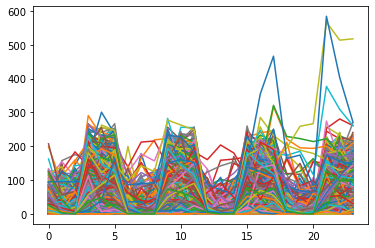

In [14]:
# Plot few lpr curves to check transition points
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

#df_partial_0_conc = df_partial_plate.loc[df_partial_plate['conc'] == 0]
df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]

#print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_0_conc))
display(df_0_conc.head(10))

#ax.plot(np.transpose(df_partial_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
#display(len(df_partial_0_conc))
#display(df_partial_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

In [17]:
#'''## identify biggest change of peaks in each ccp (chemical_conc_plate)
#0-6,
#6-12,
#12-18,
#18-24
trans_points = [2,8,14,20] # "Paritosh official"
#trans_points = [3,9,15,21] # "Paritosh official"

df_lpr_min_ccp = df_0_conc.copy()
#df_lpr_min_ccp = df_partial_0_conc.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

f_out = open("report.txt","w+")
arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    df_per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(df_per_ccp.head())
    
    for trans_index, trans_point in enumerate(trans_points):
        former_timepoints_mean = 999
        arr_diff = []
        #print ("\ntrans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            #print ("current_timepoint:" + str(current_timepoint))
            values = df_per_ccp[current_timepoint]
            #print ("values:" + str(values))
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        #print ("arr_diff:"+str(arr_diff))
        max_diff = max(arr_diff)
        index_of_max_diff = arr_diff.index(max_diff)
        
        unique_ccp = np.unique(df_per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + ", index_of_max_diff: " + str(index_of_max_diff) + "\n"
        #print (save_this)
        
        #print (index_of_max_arr_diff)
        f_out.write(save_this)
        if (trans_point == 2):
            arr_max_index_per_trans_2.append(index_of_max_diff)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(index_of_max_diff)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(index_of_max_diff)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(index_of_max_diff)
        
f_out.close()
print ("Biggest change of peaks in each ccp is identified")

Biggest change of peaks in each ccp is identified


In [18]:
display(len(df_lpr_min_ccp))
display(df_lpr_min_ccp)

6263

,chemical_conc_plate,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
84,234_0.0_14389,234,0.0,14389,H01,17.223000,0.000,5.174,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000,0.000,4.757,0.000000,1.609,0.571000,0.000,0.000,0.000,0.000000,2.566000,2.179000,234_0.0
85,234_0.0_14389,234,0.0,14389,H02,12.876000,0.000,0.000,0.000,0.000000,0.000000,0.000000,4.922,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,42.366998,0.000000,0.000000,234_0.0
86,234_0.0_14389,234,0.0,14389,H03,57.903000,0.822,0.000,0.000,0.000000,0.000000,18.125000,0.000,0.000,0.000000,0.000000,2.855000,43.871,0.000,0.781,50.187000,0.000,1.000000,0.000,5.790,0.000,56.536999,2.644000,0.000000,234_0.0
87,234_0.0_14389,234,0.0,14389,H04,31.939999,0.000,1.045,0.000,10.688000,129.418001,0.738000,0.000,0.000,2.701000,88.093001,0.000000,3.634,0.898,0.000,0.000000,4.632,0.000000,2.690,0.782,0.842,90.730999,145.285998,97.460000,234_0.0
88,234_0.0_14389,234,0.0,14389,H05,37.152999,2.601,2.289,0.000,0.000000,2.308000,0.000000,0.000,1.093,7.312000,0.000000,1.876000,0.437,0.538,0.000,13.845000,0.000,2.173000,3.817,4.593,1.673,4.054000,13.928000,53.765998,234_0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44687,4457_0.0_22097,4457,0.0,22097,A10,21.042000,2.416,0.480,56.373,86.895001,114.926001,1.245000,0.516,0.375,49.566000,73.042000,90.298000,19.612,0.000,0.261,34.952999,69.748,55.023001,10.746,5.727,0.000,0.000000,0.000000,14.501000,4457_0.0
44688,4457_0.0_22097,4457,0.0,22097,A11,12.474000,1.468,1.315,230.915,148.218001,125.695001,29.860999,0.000,0.437,193.721003,144.395000,116.016001,13.208,3.649,2.781,182.317999,147.861,118.593000,16.082,0.562,6.819,156.177001,111.660999,104.821999,4457_0.0
44689,4457_0.0_22097,4457,0.0,22097,A12,25.382000,4.202,0.000,12.345,39.535000,163.536999,14.995000,0.774,0.351,150.078999,160.641998,152.653001,7.517,3.525,2.227,138.896001,125.218,110.977001,2.549,1.105,0.000,62.325999,110.846001,154.883000,4457_0.0
44750,4457_0.0_22097,4457,0.0,22097,G12,15.183000,7.554,0.361,0.432,0.488000,0.848000,0.710000,0.210,0.795,0.000000,0.000000,1.524000,0.000,0.000,0.335,0.000000,24.479,6.273000,0.000,0.000,0.000,7.945000,0.317000,5.822000,4457_0.0


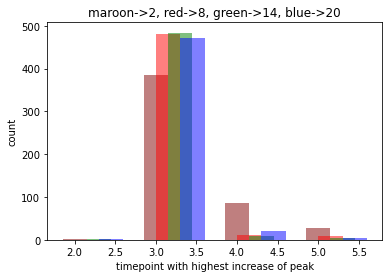


transition points at 2->3 min
mean: 3.27 , stdev: 0.56

transition points at 8->9 min
mean: 3.06 , stdev: 0.3

transition points at 14->15 min
mean: 3.04 , stdev: 0.25

transition points at 20->21 min
mean: 3.06 , stdev: 0.29


In [19]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2_unique = []
y_2 = []
for i in range(len(unique_counts)):
    x_2_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8_unique = []
y_8 = []
for i in range(len(unique_counts)):
    x_8_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14_unique = []
y_14 = []
for i in range(len(unique_counts)):
    x_14_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20_unique = []
y_20 = []
for i in range(len(unique_counts)):
    x_20_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(np.array(x_2_unique),       y_2,  color ='maroon',width = 0.3, alpha=alpha)
plt.bar(np.array(x_8_unique) +0.15, y_8,  color ='red',   width = 0.3, alpha=alpha)
plt.bar(np.array(x_14_unique)+0.3,  y_14, color ='green', width = 0.3, alpha=alpha)
plt.bar(np.array(x_20_unique)+0.45, y_20, color ='blue',  width = 0.3, alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()

print ("\ntransition points at 2->3 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_2),2), ", stdev:", round(np.std(arr_max_index_per_trans_2),2))

print ("\ntransition points at 8->9 min")
#print ("arr_max_index_per_trans_8:" + str(arr_max_index_per_trans_8))
print ("mean:", round(np.mean(arr_max_index_per_trans_8),2), ", stdev:", round(np.std(arr_max_index_per_trans_8),2))

print ("\ntransition points at 14->15 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_14),2), ", stdev:", round(np.std(arr_max_index_per_trans_14),2))

print ("\ntransition points at 20->21 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_20),2), ", stdev:", round(np.std(arr_max_index_per_trans_20),2))

In [76]:
####### stop here
a=b

NameError: name 'b' is not defined

NameError: name 'width' is not defined

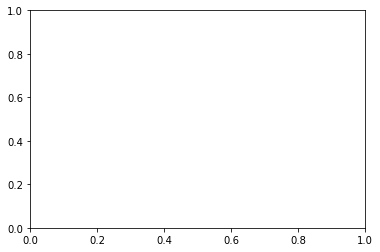

In [20]:
# fig, is the whole thing; ax1 is a subplot in the figure, 
# so we reference it to plot bars and lines there
fig, ax1 = plt.subplots()

ind = np.arange(len(arr_max_index_per_trans_20))
width = 0.15

# per dimension
colors = ['#00ff00', '#0000ff', '#ff00ff']
markers = ['x','o','v']
#xticklabels = ['50/50', '60/40', '70/30']

#
all_groups = [ arr_max_index_per_trans_8, arr_max_index_per_trans_14, arr_max_index_per_trans_20 ]

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate( all_groups ):

  # compute position for each bar
  bar_position = width*i
  ax1.bar( ind + bar_position, bar_values, width, color=colors[i] )

# plot line for each group of bars; loop-variable y_values contains values for lines
for i, y_values in enumerate( all_groups ):

  # moves the beginning of a line to the middle of the bar
  additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
  x_values = [ x + additional_space for x,_ in enumerate( y_values ) ]

  # simply plot the values in y_values
  ax1.plot( x_values, y_values, marker=markers[i], color=colors[i] )

plt.setp([ax1], xticks=ind + width, xticklabels=xticklabels)

plt.tight_layout()
plt.show()

In [ ]:
plt.bar(np.arange(len(arr_max_index_per_trans_2)),arr_max_index_per_trans_2)
plt.show()

In [ ]:
np.savetxt("arr_max_index_per_trans_2.csv", arr_max_index_per_trans_2, delimiter=",")
np.savetxt("arr_max_index_per_trans_8.csv", arr_max_index_per_trans_8, delimiter=",")
np.savetxt("arr_max_index_per_trans_14.csv", arr_max_index_per_trans_14, delimiter=",")
np.savetxt("arr_max_index_per_trans_20.csv", arr_max_index_per_trans_20, delimiter=",")

In [ ]:
display(len(np.unique(df_lpr_min['chemical.id'])))
display(np.unique(df_lpr_min['chemical.id']))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part.boxplot(column=['t1', 't2', 't3', 't4', 't5'])

In [ ]:
df_lpr_min_part.to_csv("df_lpr_min_part.csv", index=False)
display(df_lpr_min_part.head())
display(df_lpr_min_part.tail())

In [ ]:
## identify biggest peaks in each well
#0-5,
#6-11,
#12-17,
#18-23

trans_points = [2,8,14,20] # "official"

df_lpr_min_part_file = open ("df_lpr_min_part.csv") 
df_lpr_min_part_file_lines = df_lpr_min_part_file.readlines()
line_num = -1
arr_t_of_biggest_peak = []
for line in df_lpr_min_part_file_lines:
    #print ("\nline_num:"+str(line_num))

    splited_line = line.split(',')
    
    if (splited_line[0] == "chemical.id"):
        line_num += 1
        continue
    else:
        for trans_index, trans_point in enumerate(trans_points):
            #print ("trans_point:" + str(trans_point))
            biggest_peak = -99
            for i in range (-2, 4):
                current_timepoint = 't' + str(trans_point+i)
                #print (current_timepoint)
                values = df_lpr_min_part[current_timepoint]
                #print (values[line_num])
                if (float(values[line_num]) > biggest_peak):
                    biggest_peak = float(values[line_num])
                    t_of_biggest_peak = current_timepoint
            arr_t_of_biggest_peak.append(t_of_biggest_peak)
        line_num += 1

print (len(arr_t_of_biggest_peak))
print (arr_t_of_biggest_peak)

print (len(np.unique(arr_t_of_biggest_peak)))
print (np.unique(arr_t_of_biggest_peak))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part_0_conc.boxplot(column=['t1', 't2', 't3', 't4', 't5'])
#boxplot = lpr_min_0_conc.boxplot(column=['t13', 't14', 't15', 't16', 't17'])

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

delta_0_conc = lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()